In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('turkey_earthquake_tweets.csv')
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1624185742552403969,Gogoman,NaN,NaN,2012-12-26 12:08:27+00:00,369,2076.0,99630.0,False,2023-02-10 23:17:11+00:00,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,NaN,Twitter for Android,0.0,0.0,False
1,1624155272179580928,Crypto Dough Doe,"London, England",Get rich our die buying! $link,2019-11-13 23:30:36+00:00,1002,447.0,3798.0,False,2023-02-10 21:16:06+00:00,Hi People...any help here would be much apprec...,NaN,Twitter Web App,0.0,0.0,False
2,1624144833647415325,Eylem KILIÇ,NaN,⚕,2020-07-21 16:12:08+00:00,85,143.0,2737.0,False,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desp...,"['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']",Twitter for Android,0.0,0.0,False
3,1624123056372187143,bee | tarlos 🎗,NaN,NaN,2018-03-24 12:03:03+00:00,0,6.0,68704.0,False,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #Turkey...,"['TurkeyQuake', 'türkiye', 'deprem']",Twitter for iPhone,0.0,0.0,False
4,1624121846479061019,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],Twitter for iPhone,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28839,1629145875841798144,𝕽𝖔𝖇 ☘ ᚏᚑᚔᚁᚓᚐᚏᚇ,Northern Ireland,Full-time rare bastard. I stream on Twitch and...,2019-08-28 14:42:05+00:00,75,142.0,1372.0,False,2023-02-24 15:46:59+00:00,Alright lads I'll be going live in fifteen min...,NaN,Twitter Web App,3.0,4.0,False
28840,1629143368348364806,Athens Democracy Forum,"Athens, Greece","Bringing together leaders, thinkers, and exper...",2019-06-03 14:14:44+00:00,1675,602.0,454.0,False,2023-02-24 15:37:01+00:00,Photo of the week: The aftermath of the devast...,NaN,Twitter Web App,0.0,0.0,False
28841,1629143010817482753,Raindrop Foundation Austin,NaN,Raindrop Foundation Austin is a nonprofit corp...,2015-01-21 00:26:24+00:00,107,275.0,62.0,False,2023-02-24 15:35:36+00:00,"""Hope for Turkey: A Fundraiser for Earthquake ...",NaN,Twitter Web App,2.0,2.0,False
28842,1629134382584807425,محب الأمطار,NaN,NaN,2021-10-16 10:40:28+00:00,698,470.0,24237.0,False,2023-02-24 15:01:19+00:00,"O Allah, protect the people of Turkey and Syri...",NaN,Twitter for Android,3.0,7.0,False


In [3]:
unique_locations = df['user_location'].nunique()
print("Number of unique locations:", unique_locations)

Number of unique locations: 4865


In [4]:
top_locations = df['user_location'].value_counts().head(15)
print("Top 15 locations by frequency:")
print(top_locations)

Top 15 locations by frequency:
India                   852
Turkey                  538
Kurdistan, Worldwide    392
England                 342
United States           317
Pakistan                292
New Delhi, India        288
İstanbul, Türkiye       274
London, England         240
New Delhi               184
Mumbai, India           183
Venezuela               164
United Kingdom          161
Islamabad, Pakistan     157
Türkiye                 150
Name: user_location, dtype: int64


In [5]:
all_hashtags = df['hashtags'].explode().to_list()

# Display the combined array of hashtags
print(all_hashtags)

[nan, nan, "['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']", "['TurkeyQuake', 'türkiye', 'deprem']", "['TurkeyQuake']", "['TurkeyQuake', 'SyriaNeedsHelp', 'helpSyrianPeople', 'earthquakeinsyria', 'ISRO', 'OperationDost']", nan, "['TurkeySyriaEarthquake', 'earthquaketurkey']", nan, nan, "['earthquakeinsyria', 'earthquaketurkey', 'EarthquakeTurkeySyria']", nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, "['Humanity', 'planet', 'disasters', 'CreativeSociety']", "['People', 'CreativeSociety']", nan, "['democracy', 'Yutube', 'CreativeSociety']", "['people']", "['People', 'CreativeSociety', 'life', 'Turkey', 'Syria']", "['People', 'CreativeSociety', 'life', 'Turkey', 'Syria']", "['humanity', 'CreativeSociety']", "['People', 'CreativeSociety', 'life', 'Turkey', 'Syria']", nan, "['Turkey', 'TurkeyQuake']", "['turkey', 'kahramanmaraş', 'deprem', 'türkiye', 'afad', 'earthquake', 'earthquaketurkey']", "['TurkeyEarthquake', 'earthquake', 'Turke

In [6]:
type(all_hashtags)

list

In [7]:
import ast
df['hashtags'] = df['hashtags'].fillna("[]")
df['hashtags'] = df['hashtags'].apply(lambda x: ast.literal_eval(x))
all_hashtags = [hashtag for sublist in df['hashtags'] for hashtag in sublist]

# Display the combined list of hashtags
print(all_hashtags)


['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD', 'TurkeyQuake', 'türkiye', 'deprem', 'TurkeyQuake', 'TurkeyQuake', 'SyriaNeedsHelp', 'helpSyrianPeople', 'earthquakeinsyria', 'ISRO', 'OperationDost', 'TurkeySyriaEarthquake', 'earthquaketurkey', 'earthquakeinsyria', 'earthquaketurkey', 'EarthquakeTurkeySyria', 'Humanity', 'planet', 'disasters', 'CreativeSociety', 'People', 'CreativeSociety', 'democracy', 'Yutube', 'CreativeSociety', 'people', 'People', 'CreativeSociety', 'life', 'Turkey', 'Syria', 'People', 'CreativeSociety', 'life', 'Turkey', 'Syria', 'humanity', 'CreativeSociety', 'People', 'CreativeSociety', 'life', 'Turkey', 'Syria', 'Turkey', 'TurkeyQuake', 'turkey', 'kahramanmaraş', 'deprem', 'türkiye', 'afad', 'earthquake', 'earthquaketurkey', 'TurkeyEarthquake', 'earthquake', 'Turkey', 'earthquaketurkey', 'Syria', 'syriaearthquake', 'TurkeyQuake', 'Syrie', 'PreyforTurkey', 'TurkeyEarthquake', 'earthquakeinturkey', 'turkey', 'TurkeyQuake', 'earthquaketurkey', 'HelpTurkey', 'Turcja

In [8]:
from collections import Counter

top_hashtags = Counter(all_hashtags).most_common(10)
print("Top 10 hashtags by frequency:")
print(top_hashtags)


Top 10 hashtags by frequency:
[('TurkeyEarthquake', 6330), ('Turkey', 3840), ('TurkeyQuake', 2287), ('earthquaketurkey', 2040), ('earthquake', 1943), ('Syria', 1265), ('TurkeySyriaEarthquake', 1234), ('Turkiye', 752), ('earthquakeinturkey', 574), ('turkey', 542)]


In [9]:
!pip install wordcloud

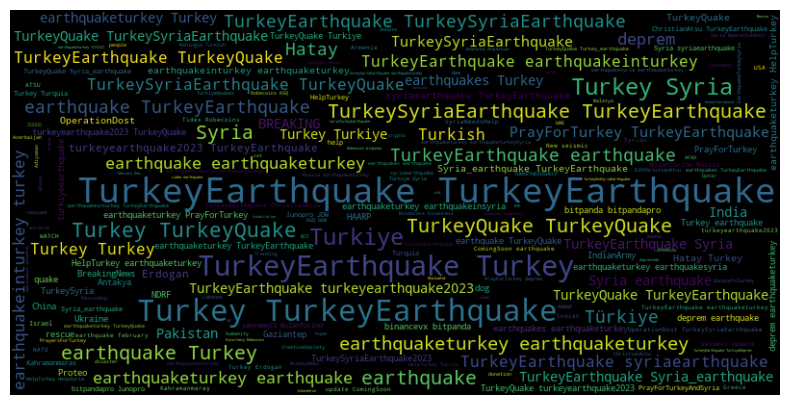

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

hashtag_wordcloud = WordCloud(width=800, height=400).generate(' '.join(all_hashtags))
plt.figure(figsize=(10, 5))
plt.imshow(hashtag_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [11]:
missing_values = df.isna().sum()

total_rows = len(df)
missing_ratio = (missing_values / total_rows) * 100  

missing_info = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values,
    'Missing Ratio (%)': missing_ratio
})

print(missing_info)

                            Column  Missing Values  Missing Ratio (%)
id                              id               0           0.000000
user_name                user_name               3           0.010401
user_location        user_location            8077          28.002358
user_description  user_description            2597           9.003606
user_created          user_created               0           0.000000
user_followers      user_followers               0           0.000000
user_friends          user_friends               1           0.003467
user_favourites    user_favourites               1           0.003467
user_verified        user_verified               1           0.003467
date                          date               1           0.003467
text                          text               1           0.003467
hashtags                  hashtags               0           0.000000
source                      source               2           0.006934
retweets            

In [12]:
pip install nrclex

Note: you may need to restart the kernel to use updated packages.


In [13]:
from nrclex import NRCLex

In [47]:
text =df['text'].head(20)
text[2]

'@JLo @intimissimi #TurkeyQuake  we are in desperate please help jennifer i love you #AhbapDernegi #hatay #AFAD'

In [52]:
emotion = NRCLex(text[13])


In [53]:
print(emotion.top_emotions)

[('negative', 0.25)]


In [54]:
print(emotion.raw_emotion_scores)

{'anger': 2, 'fear': 2, 'negative': 3, 'sadness': 2, 'surprise': 2, 'disgust': 1}


In [21]:
import pandas as pd
from nrclex import NRCLex

# Assuming you have a DataFrame 'df' with a 'text' column
# Create an empty list to store the top emotions
top_emotions = []

# Loop through the 'text' column and perform NRC lexicon analysis
for text in df['text']:
    text_str = str(text)  # Convert to string
    emotion = NRCLex(text_str)
    if emotion.raw_emotion_scores:
        top_emotion = max(emotion.raw_emotion_scores, key=emotion.raw_emotion_scores.get)
        top_emotions.append(top_emotion)
    else:
        top_emotions.append(None)  # Handle the case when no emotion is detected

# Add a new column to your DataFrame with the extracted top emotions
df['top_emotion'] = top_emotions


In [22]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,top_emotion
0,1624185742552403969,Gogoman,NaN,NaN,2012-12-26 12:08:27+00:00,369,2076.0,99630.0,False,2023-02-10 23:17:11+00:00,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,[],Twitter for Android,0.0,0.0,False,joy
1,1624155272179580928,Crypto Dough Doe,"London, England",Get rich our die buying! $link,2019-11-13 23:30:36+00:00,1002,447.0,3798.0,False,2023-02-10 21:16:06+00:00,Hi People...any help here would be much apprec...,[],Twitter Web App,0.0,0.0,False,None
2,1624144833647415325,Eylem KILIÇ,NaN,⚕,2020-07-21 16:12:08+00:00,85,143.0,2737.0,False,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desp...,"[TurkeyQuake, AhbapDernegi, hatay, AFAD]",Twitter for Android,0.0,0.0,False,negative
3,1624123056372187143,bee | tarlos 🎗,NaN,NaN,2018-03-24 12:03:03+00:00,0,6.0,68704.0,False,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #Turkey...,"[TurkeyQuake, türkiye, deprem]",Twitter for iPhone,0.0,0.0,False,None
4,1624121846479061019,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,[TurkeyQuake],Twitter for iPhone,0.0,0.0,False,trust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28839,1629145875841798144,𝕽𝖔𝖇 ☘ ᚏᚑᚔᚁᚓᚐᚏᚇ,Northern Ireland,Full-time rare bastard. I stream on Twitch and...,2019-08-28 14:42:05+00:00,75,142.0,1372.0,False,2023-02-24 15:46:59+00:00,Alright lads I'll be going live in fifteen min...,[],Twitter Web App,3.0,4.0,False,joy
28840,1629143368348364806,Athens Democracy Forum,"Athens, Greece","Bringing together leaders, thinkers, and exper...",2019-06-03 14:14:44+00:00,1675,602.0,454.0,False,2023-02-24 15:37:01+00:00,Photo of the week: The aftermath of the devast...,[],Twitter Web App,0.0,0.0,False,anger
28841,1629143010817482753,Raindrop Foundation Austin,NaN,Raindrop Foundation Austin is a nonprofit corp...,2015-01-21 00:26:24+00:00,107,275.0,62.0,False,2023-02-24 15:35:36+00:00,"""Hope for Turkey: A Fundraiser for Earthquake ...",[],Twitter Web App,2.0,2.0,False,positive
28842,1629134382584807425,محب الأمطار,NaN,NaN,2021-10-16 10:40:28+00:00,698,470.0,24237.0,False,2023-02-24 15:01:19+00:00,"O Allah, protect the people of Turkey and Syri...",[],Twitter for Android,3.0,7.0,False,positive


In [25]:
# Count occurrences of 'sad' and 'fear' emotions
total_sad_count = df['top_emotion'].apply(lambda x: 1 if x == 'sad' else 0).sum()
total_fear_count = df['top_emotion'].apply(lambda x: 1 if x == 'fear' else 0).sum()

print("Total 'sad' count:", total_sad_count)
print("Total 'fear' count:", total_fear_count)


Total 'sad' count: 0
Total 'fear' count: 2684


In [28]:
import pandas as pd
from nrclex import NRCLex

# Assuming you have a DataFrame 'df' with a 'text' column
# Create a list of emotions to track
emotions_to_track = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

# Create new columns for each emotion and initialize them to 0
for emotion in emotions_to_track:
    df[emotion] = 0

# Loop through the 'text' column and perform NRC lexicon analysis
for index, row in df.iterrows():
    text = str(row['text'])
    emotion = NRCLex(text)
    for e in emotions_to_track:
        if e in emotion.raw_emotion_scores:
            df.at[index, e] = 1

# Keep only the 'text', 'top_emotion', and the columns for individual emotions
df = df[['text', 'top_emotion'] + emotions_to_track]


In [30]:
df

,text,top_emotion,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,joy,0,0,0,0,1,0,0,1
1,Hi People...any help here would be much apprec...,None,0,0,0,0,0,0,0,0
2,@JLo @intimissimi #TurkeyQuake we are in desp...,negative,0,0,0,0,1,0,0,0
3,thank you rafael this means a lot 😭😭😭💜 #Turkey...,None,0,0,0,0,0,0,0,0
4,@adgpi Hey @BBCWorld try to cover these storie...,trust,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
28839,Alright lads I'll be going live in fifteen min...,joy,0,0,0,0,1,0,0,0
28840,Photo of the week: The aftermath of the devast...,anger,1,0,1,1,0,1,1,1
28841,"""Hope for Turkey: A Fundraiser for Earthquake ...",positive,0,0,0,0,0,0,0,0
28842,"O Allah, protect the people of Turkey and Syri...",positive,0,1,0,1,1,1,0,1


In [31]:
# Assuming you have a DataFrame 'df'
# Specify the file path where you want to save the CSV file
file_path = "/Users/srragulraj/Desktop/filename.csv"

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

# Replace '/path/to/your/desktop/filename.csv' with the actual file path and filename you want to use.


In [61]:
import pandas as pd
from nrclex import NRCLex

# Assuming you have a DataFrame 'df' with a 'text' column
# Create an empty list to store the top emotions
top_emotions = []

# Loop through the 'text' column and perform NRC lexicon analysis
for text in df['text']:
    if isinstance(text, float):  # Check if the value is a float
        text = str(text)  # Convert float to string
    emotion = NRCLex(text)

    if emotion.raw_emotion_scores:
        top_emotion = max(emotion.raw_emotion_scores, key=emotion.raw_emotion_scores.get)
        top_emotions.append(top_emotion)
    else:
        top_emotions.append(None)  # Handle the case when no emotion is detected

# Add a new column to your DataFrame with 1 for the top emotion and 0 for others
for emotion in set(top_emotions):
    df[emotion] = [1 if e == emotion else 0 for e in top_emotions]


/var/folders/km/3_vdpgf97jv88cvvt5922w0c0000gn/T/ipykernel_16854/2460334611.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[emotion] = [1 if e == emotion else 0 for e in top_emotions]
/var/folders/km/3_vdpgf97jv88cvvt5922w0c0000gn/T/ipykernel_16854/2460334611.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[emotion] = [1 if e == emotion else 0 for e in top_emotions]
/var/folders/km/3_vdpgf97jv88cvvt5922w0c0000gn/T/ipykernel_16854/2460334611.py:22: SettingWithCopyWarning: 
A value is trying to

In [62]:
df

,text,top_emotion,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,None
0,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,joy,0,0,0,0,1,0,0,0,0,0,0
1,Hi People...any help here would be much apprec...,None,0,0,0,0,0,0,0,0,0,0,1
2,@JLo @intimissimi #TurkeyQuake we are in desp...,joy,0,0,0,0,0,0,0,0,1,0,0
3,thank you rafael this means a lot 😭😭😭💜 #Turkey...,None,0,0,0,0,0,0,0,0,0,0,1
4,@adgpi Hey @BBCWorld try to cover these storie...,trust,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28839,Alright lads I'll be going live in fifteen min...,joy,0,0,0,0,1,0,0,0,0,0,0
28840,Photo of the week: The aftermath of the devast...,anger,1,0,0,0,0,0,0,0,0,0,0
28841,"""Hope for Turkey: A Fundraiser for Earthquake ...",None,0,0,0,0,0,0,0,0,0,1,0
28842,"O Allah, protect the people of Turkey and Syri...",fear,0,0,0,0,0,0,0,0,0,1,0


In [63]:
# Assuming you have a DataFrame 'df'
# Specify the file path where you want to save the CSV file
file_path = "/Users/srragulraj/Desktop/filename3.csv"

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

# Replace '/path/to/your/desktop/filename.csv' with the actual file path and filename you want to use.
